In [24]:
import xml.etree.ElementTree as ET
import requests
import pandas as pd
# script for returning elevation from lat, long, based on open elevation data
# which in turn is based on SRTM
# not support any more see in open-elevation
# need build own open elevation

def get_elevation(lat, long): 
    query = ('http://192.168.0.131:10000/api/v1/lookup'
             f'?locations={lat},{long}')
    r = requests.get(query).json()  # json object, various ways you can extract value
    # one approach is to use pandas json functionality:
    elevation = pd.io.json.json_normalize(r, 'results')['elevation'].values[0]
    return elevation
def elevation(lat, lng):
    apikey = "USE YOUR OWN KEY !!!"
    url = "https://maps.googleapis.com/maps/api/elevation/json"
    request = requests.get(url+"?locations="+str(lat)+","+str(lng)+"&key="+apikey)
    try:
        results = json.loads(request.text).get('results')
        if 0 < len(results):
            elevation = results[0].get('elevation')
            #resolution = results[0].get('resolution') # for RESOLUTION
            # ELEVATION
            return elevation
        else:
            print('HTTP GET Request failed.')
    except ValueError as e:
        print('JSON decode failed: '+str(request) + str(e))

In [25]:
lat=37.8274723
lon=-122.2832012
z = get_elevation(lat,lon)
z

9

In [32]:
xmlfile = "./emeryville2019-10-19-19-39-33/osm_ele.osm.xml"
import time
def get_latlon(element):
    lat = element.attrib['lat']
    lon = element.attrib['lon']
    return lat, lon
def add_Ele(xmlfile):
    start = time.time()
    tree_n = ET.parse(xmlfile)
    root_n = tree_n.getroot()
    i = 0
    for element in root_n:
        if(i%10000 == 0):
            end = time.time()
            print('Get ele for {0} nodes, time consuming:{1}'.format(i,end-start))
        if(element.tag=='node'):
            tag_ele = ET.Element("tag")
            tag_ele.set('k','ele')
            lat,lon = get_latlon(element)
            ele = get_elevation(lat, lon)
            tag_ele.set('v',str(ele))
            element.append(tag_ele)
            i += 1
    tree_n.write(xmlfile)
    end = time.time()
    print('Get ele for {0} nodes, time consuming:{1}'.format(i,end-start))
add_Ele(xmlfile)

get ele for 0 nodes, time used:0.7248704433441162
get ele for 0 nodes, time used:0.725006103515625
get ele for 0 nodes, time used:0.7250275611877441
get ele for 10000 nodes, time used:63.340635538101196
get ele for 20000 nodes, time used:118.23824381828308
get ele for 30000 nodes, time used:175.0595862865448
Time consuming: -233.2725110054016


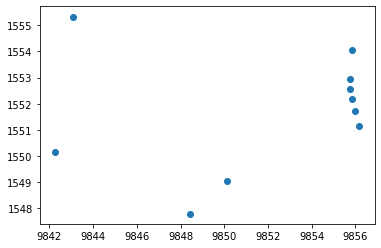

In [2]:
import matplotlib.pyplot as plt
Y=[506.40, 493.60, 493.16, 492.60, 491.82, 490.82, 489.60, 489.60, 491.82, 492.60, 493.16, 493.49, 493.60, 506.40]
X=[510.40, 510.40, 508.18, 507.40, 506.84, 506.51, 506.40, 493.60, 493.16, 492.60, 491.82, 490.82, 489.60, 489.60]
plt.scatter(X, Y)
XY=[9843.09,1555.33,9855.83,1554.05,9855.74,1552.96,9855.76,1552.57,9855.83,1552.19,9855.97,1551.74,9856.17,1551.14,9850.13,1549.03,9848.41,1547.80,9842.26,1550.16
]
X=[]
Y=[]
i = 0
while i <len(XY):
    if i%2 == 0:
        X.append(XY[i])
    else:
        Y.append(XY[i])
    i += 1
plt.scatter(X, Y)